Importing Necessary Packages

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading the dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv
Saving Test.csv to Test.csv
Saving Submission.csv to Submission.csv


Understanding the data

In [0]:
df=pd.read_csv('Train.csv')

In [0]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e728516d8>,
      dtype=object)

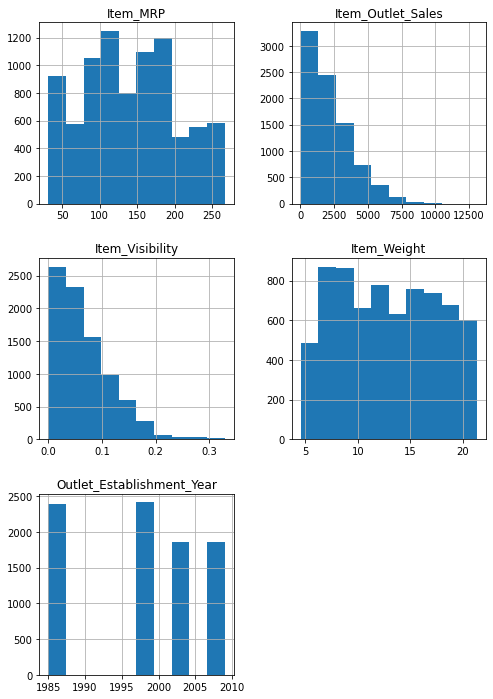

In [0]:
df.hist(figsize=(8,12))

In [0]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]>

Correlation among the attributes

In [0]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Data Inspection

In [0]:
df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
DRE49     9
FDQ40     9
FDP25     9
         ..
FDK57     1
DRF48     1
FDE52     1
FDN52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [0]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')

In [0]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')

In [0]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [0]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Getting entire column as same type

In [0]:
df.Item_Identifier=df.Item_Identifier.astype('category')

In [0]:
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')

In [0]:
df.Item_Type=df.Item_Type.astype('category')

In [0]:
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')

In [0]:
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')

In [0]:
df.Outlet_Type=df.Outlet_Type.astype('category')

In [0]:
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')

In [0]:
df.Outlet_Size=df.Outlet_Size.astype('category')

In [0]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')
df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')

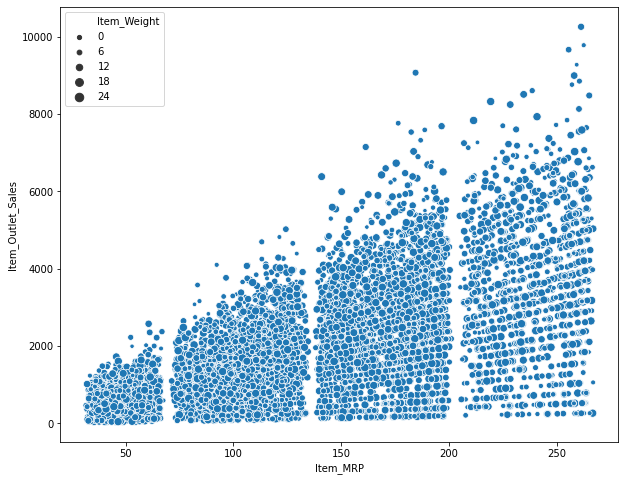

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',size='Item_Weight',data=df)

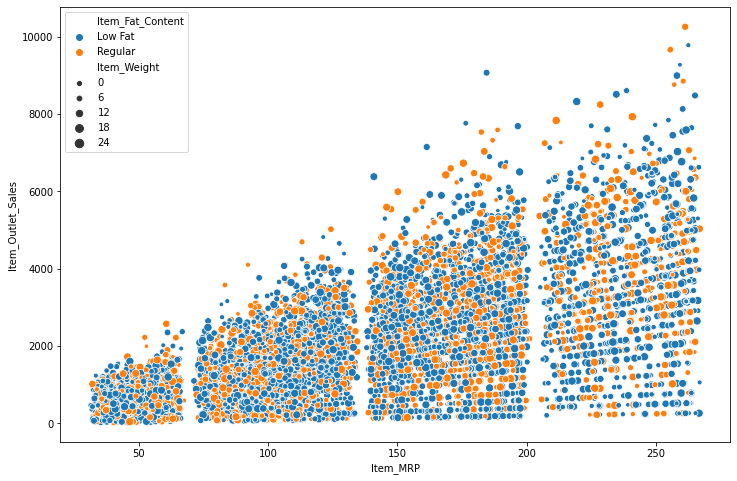

In [0]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

In [0]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Binning

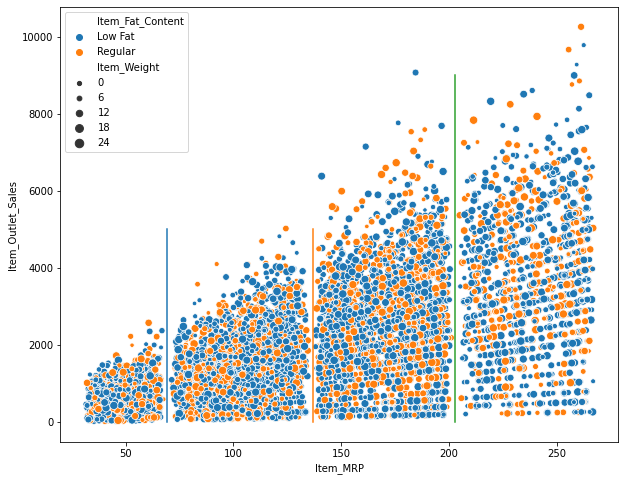

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

In [0]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [0]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


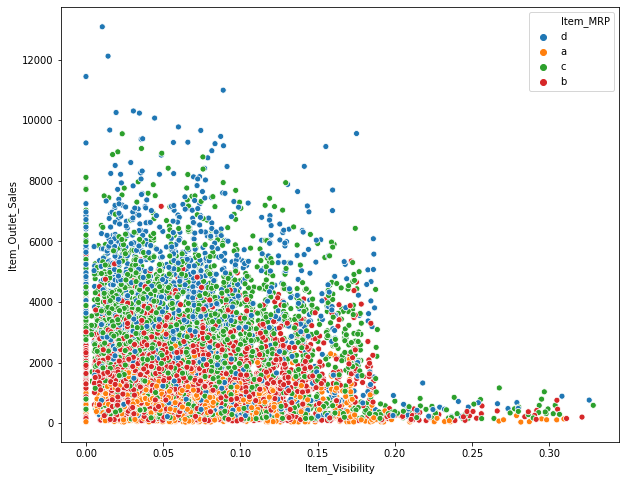

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',data=df)

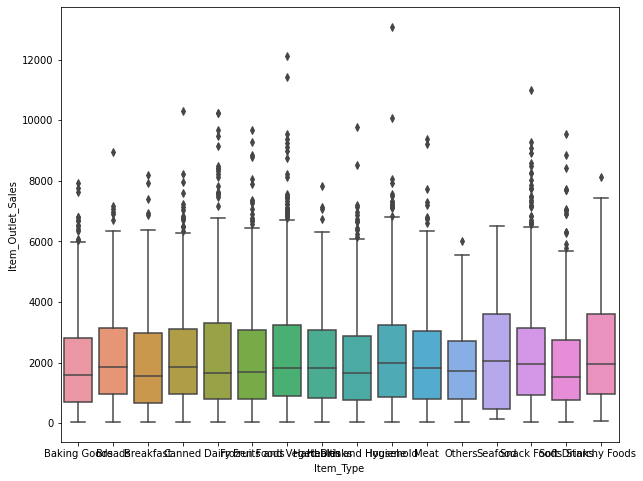

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

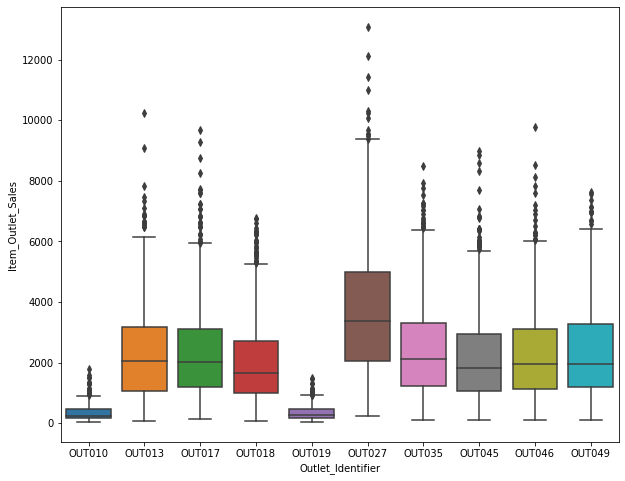

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

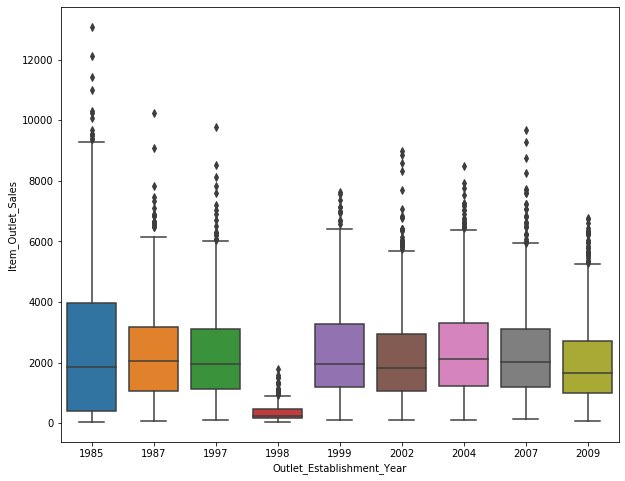

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

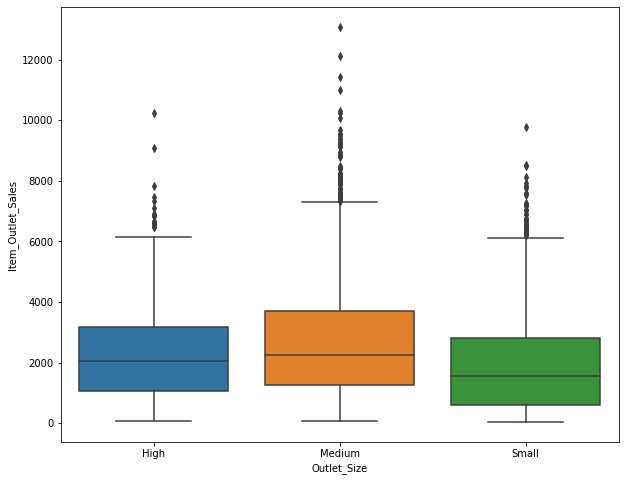

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

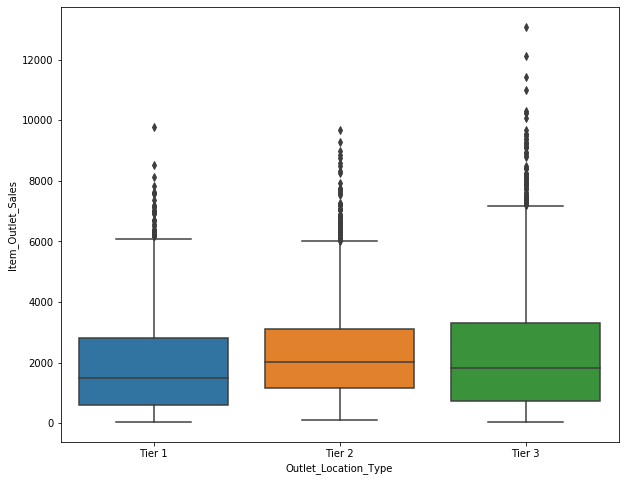

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

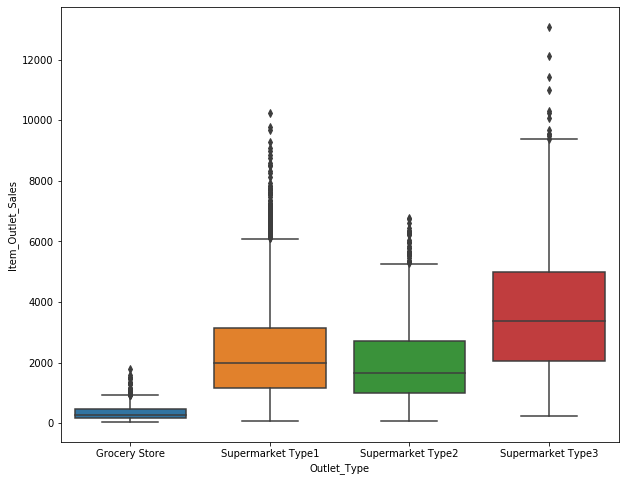

In [0]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

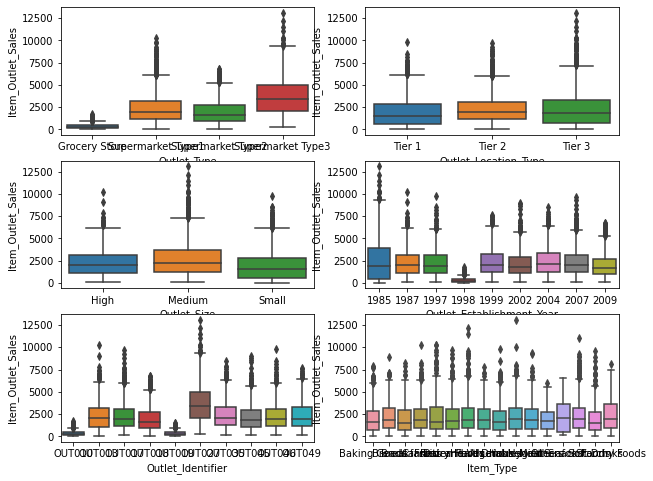

In [0]:
fig,axes=plt.subplots(3,2,figsize=(10,8))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[1,1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2,0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[2,1],data=df)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null category
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null category
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null category
Item_MRP                     8523 non-null category
Outlet_Identifier            8523 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Type                  8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(8), float64(3), int64(1)
memory usage: 395.4 KB


In [0]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

In [0]:
df.describe()

,Item_Weight,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,1997.831867,2181.288914
std,4.643456,0.051598,8.371760,1706.499616
min,4.555000,0.000000,1985.000000,33.290000
25%,8.773750,0.026989,1987.000000,834.247400
50%,12.600000,0.053931,1999.000000,1794.331000
75%,16.850000,0.094585,2004.000000,3101.296400
max,21.350000,0.328391,2009.000000,13086.964800


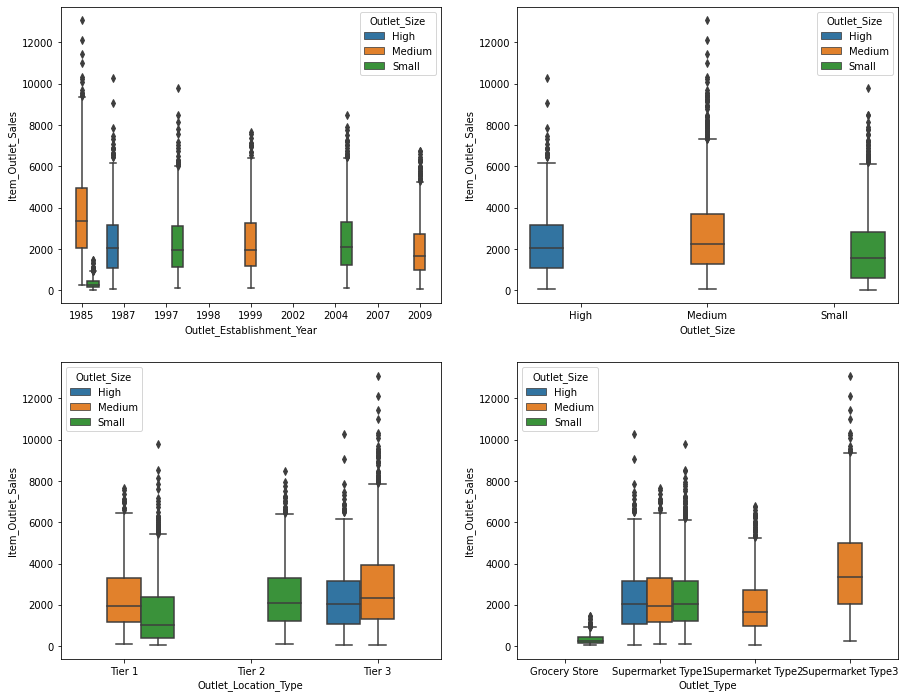

In [0]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [0]:
data=df[attributes]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


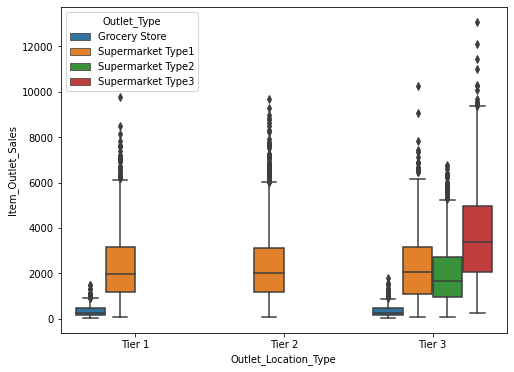

In [0]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

Checking for Null values in the data

In [0]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


Grouping data

In [0]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [0]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
...,...,...,...,...,...,...,...,...
8473,c,Grocery Store,Tier 3,NaN,1998,OUT010,Hard Drinks,431.4384
8480,c,Grocery Store,Tier 1,Small,1985,OUT019,Snack Foods,459.4020
8486,a,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,45.2744
8490,c,Grocery Store,Tier 1,Small,1985,OUT019,Fruits and Vegetables,487.3656


In [0]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [0]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [0]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [0]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [0]:
data.Outlet_Size=data.apply(func,axis=1)

In [0]:
data.head(15)

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052
5,a,Supermarket Type2,Tier 3,a,2009,OUT018,Baking Goods,556.6088
6,a,Supermarket Type1,Tier 3,a,1987,OUT013,Snack Foods,343.5528
7,b,Supermarket Type3,Tier 3,b,1985,OUT027,Snack Foods,4022.7636
8,b,Supermarket Type1,Tier 2,b,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,c,2007,OUT017,Frozen Foods,4710.5350


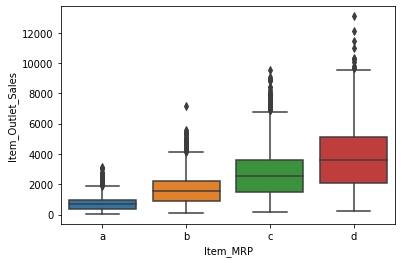

In [0]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [0]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [0]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [0]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

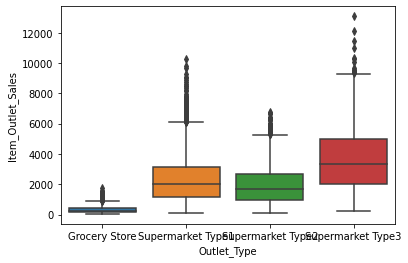

In [0]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

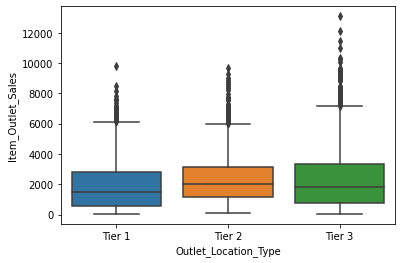

In [0]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [0]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [0]:
data[data['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [0]:
data=data.drop(index=4289)

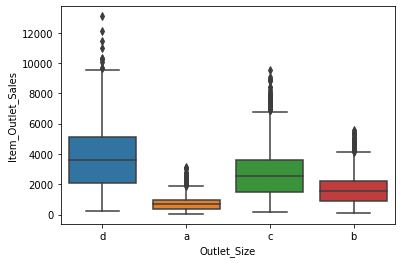

In [0]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

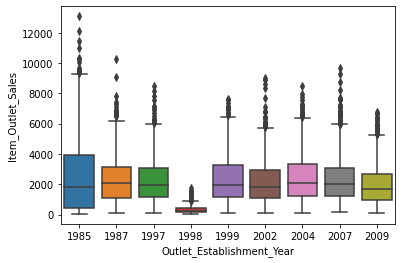

In [0]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [0]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')

In [0]:
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

In [0]:
data_dummy['Item_Outlet_Sales']=data_label

In [0]:
data_dummy.shape

(8521, 35)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,test=train_test_split(data_dummy,test_size=0.20,random_state=2019)

In [0]:
train.shape

(6816, 35)

In [0]:
test.shape

(1705, 35)

In [0]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

Applying modelling techniques

linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr=LinearRegression()

In [0]:
lr.fit(train,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.metrics import r2_score

In [0]:
predict_lr=lr.predict(test)

In [0]:
mse=mean_squared_error(test_label,predict_lr)

In [0]:
lr_score=np.sqrt(mse)

In [0]:
lr_score

1172.0122878325346

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
lr_score_cross=np.sqrt(-score)

In [0]:
np.mean(lr_score_cross)

1149.4254158305741

In [0]:
np.median(lr_score_cross)

1147.1436232363562

In [0]:
np.std(lr_score_cross)

32.5001509200018

Ridge

In [0]:
from sklearn.linear_model import Ridge

In [0]:
r=Ridge(alpha=0.05,solver='cholesky')

In [0]:
r.fit(train,train_label)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [0]:
predict_r=r.predict(test)

In [0]:
mse=mean_squared_error(test_label,predict_r)

In [0]:
r_score=np.sqrt(mse)

In [0]:
r_score

1170.8362071061267

Support Vector Machine

In [0]:
from sklearn.svm import SVR

In [0]:
svm=SVR(epsilon=15,kernel='linear')

In [0]:
svm.fit(train,train_label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=15, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predict_r=svm.predict(test)

In [0]:
mse=mean_squared_error(test_label,predict_r)

In [0]:
svm_score=np.sqrt(mse)

In [0]:
svm_score

1372.7850836640566

In [0]:
from sklearn.svm import SVR

In [0]:
score=cross_val_score(svm,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
svm_score_cross=np.sqrt(-score)

In [0]:
np.mean(svm_score_cross),np.median(svm_score_cross)

(1331.8065213221926, 1326.1212836071556)

In [0]:
np.std(svm_score_cross)

44.931011641419566

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dtr=DecisionTreeRegressor()

In [0]:
dtr.fit(train,train_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
predict_r=dtr.predict(test)

In [0]:
mse=mean_squared_error(test_label,predict_r)

In [0]:
dtr_score=np.sqrt(mse)

In [0]:
dtr_score

1123.1955839571694

In [0]:
dtr=DecisionTreeRegressor()

In [0]:
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
dtr_score_cross=np.sqrt(-score)

In [0]:
np.mean(dtr_score_cross)

1097.216824037842

In [0]:
np.median(dtr_score_cross)

1095.1795947464527

In [0]:
np.std(dtr_score_cross)

32.98894477916789

Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf=RandomForestRegressor()

In [0]:
rf.fit(train,train_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
predict_r=rf.predict(test)

In [0]:
mse=mean_squared_error(test_label,predict_r)

In [0]:
rf_score=np.sqrt(mse)

In [0]:
rf_score

1123.6312779062403

In [0]:
rf=RandomForestRegressor()

In [0]:
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
rf_score_cross=np.sqrt(-score)

In [0]:
np.mean(rf_score_cross),np.median(rf_score_cross)

(1097.0777806672418, 1095.585298803821)

In [0]:
np.std(rf_score_cross)

32.97389330750236

Bagging

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:
br=BaggingRegressor(max_samples=70)

In [0]:
br.fit(train,train_label)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=70, n_estimators=10, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [0]:
score=br.predict(test)

In [0]:
br_score=mean_squared_error(test_label,score)

In [0]:
br_score=np.sqrt(br_score)

In [0]:
br_score

1154.9767225493015

In [0]:
br=BaggingRegressor()

In [0]:
score=cross_val_score(br,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
br_score_cross=np.sqrt(-score)

In [0]:
np.mean(br_score_cross),np.median(br_score_cross)

(1096.580744843307, 1095.843594553963)

In [0]:
np.std(br_score_cross)

32.73753921386507

Adaptive boosting

In [0]:
from sklearn.ensemble import AdaBoostRegressor

In [0]:
ada=AdaBoostRegressor()

In [0]:
ada.fit(train,train_label)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [0]:
g=ada.predict(test)

In [0]:
ada_score=mean_squared_error(test_label,g)

In [0]:
ada_score=np.sqrt(ada_score)

In [0]:
ada_score

1187.3444201365885

In [0]:
ada=AdaBoostRegressor()

In [0]:
score=cross_val_score(ada,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [0]:
ada_score_cross=np.sqrt(-score)

In [0]:
np.mean(ada_score_cross),np.median(ada_score_cross)

(1182.4380031673152, 1193.5165409811275)

In [0]:
np.std(ada_score_cross)

26.822551420996348

Gradient boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train,train_label)
p=gbr.predict(test)
gb_score=mean_squared_error(test_label,p)
gb_score=np.sqrt(gb_score)
gb_score

1122.6951622673103

In [0]:
gb=GradientBoostingRegressor()
score=cross_val_score(gb,train,train_label,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)


(1096.661955906873, 33.23199448477195)

Training

In [0]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [0]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross,
                     ada_score,ada_score_cross,br_score,br_score_cross,gb_score,gb_score_cross]},index=name)

In [0]:
go['RSME']=go.applymap(lambda x:x.mean())

In [0]:
go.RSME.sort_values()

Bagging CV                  1096.580745
Gradient Boost CV           1096.661956
Random Forest CV            1097.077781
Decision Tree Regression    1097.216824
Gradient Boost              1122.695162
Decision Tree               1123.195584
Random Forest               1123.631278
Linear Regression CV        1149.425416
Bagging                     1154.976723
Ridge Regression            1170.836207
Linear Regression           1172.012288
Ada Boost CV                1182.438003
Ada Boost                   1187.344420
SVM CV                      1331.806521
SVM                         1372.785084
Name: RSME, dtype: float64

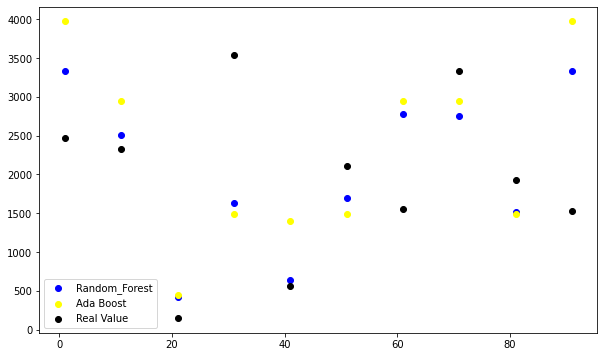

In [0]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),g[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),test_label[0:100:10],color='black')
plt.legend(['Random_Forest','Ada Boost','Real Value'])

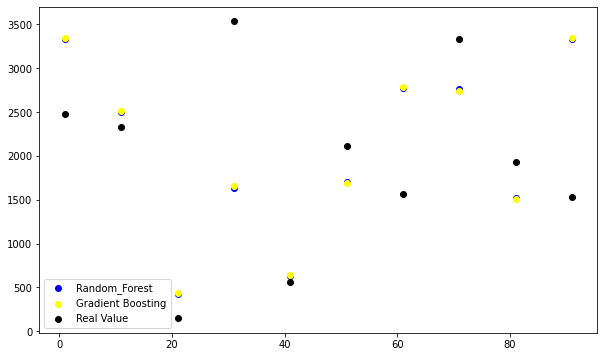

In [0]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),p[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),test_label[0:100:10],color='black')
plt.legend(['Random_Forest','Gradient Boosting','Real Value'])

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(train,train_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_...ne,
                         

In [0]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=18, max_leaf_nodes=9,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
gb=gs.best_estimator_

In [0]:
total=pd.concat([train,test],axis=0,ignore_index=True)

In [0]:
total_label=pd.concat([train_label,test_label],axis=0,ignore_index=True)

In [0]:
total_label.shape,total.shape

((8521,), (8521, 34))

In [0]:
gb.fit(total,total_label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=18, max_leaf_nodes=9,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
test=pd.read_csv('Test.csv')

In [0]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [0]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [0]:
attributes=['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [0]:
test=test[attributes]

In [0]:
test.shape

(5681, 7)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null float64
Outlet_Type                  5681 non-null object
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null object
Item_Type                    5681 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [0]:
test.Item_MRP=pd.cut(test.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)

In [0]:
test.Item_Type=test.Item_Type.astype('category')

In [0]:
test.Outlet_Size=test.Outlet_Size.astype('category')

In [0]:
test.Outlet_Identifier=test.Outlet_Identifier.astype('category')

In [0]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('int64')

In [0]:
test.Outlet_Type=test.Outlet_Type.astype('category')

In [0]:
test.Outlet_Location_Type=test.Outlet_Location_Type.astype('category')

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(6), int64(1)
memory usage: 79.5 KB


In [0]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null category
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(7)
memory usage: 41.1 KB


In [0]:
  def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [0]:
test.Outlet_Size=test.apply(func,axis=1)

In [0]:
test_dummy=pd.get_dummies(test.iloc[:,0:6])

In [0]:
test_dummy.head(15)

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_a,Outlet_Size_b,Outlet_Size_c,Outlet_Size_d,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [0]:
predict=gb.predict(test_dummy)

In [0]:
predict.shape

(5681,)

In [0]:
sample=pd.read_csv('Submission.csv')

In [0]:
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [0]:
del sample['Item_Outlet_Sales']

In [0]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})

In [0]:
corr_ans=pd.concat([sample,df],axis=1)

In [0]:
del corr_ans['Unnamed: 0']

KeyError: ignored

In [0]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1744.532616
1,FDW14,OUT017,2222.481311
2,NCN55,OUT010,735.688926
3,FDQ58,OUT017,2678.673089
4,FDY38,OUT027,4985.921227
...,...,...,...
5676,FDB58,OUT046,2138.332807
5677,FDD47,OUT018,2735.532953
5678,NCO17,OUT045,2222.481311
5679,FDJ26,OUT017,2609.400828


In [0]:
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1744.532616
1,FDW14,OUT017,2222.481311
2,NCN55,OUT010,735.688926
3,FDQ58,OUT017,2678.673089
4,FDY38,OUT027,4985.921227
...,...,...,...
5676,FDB58,OUT046,2138.332807
5677,FDD47,OUT018,2735.532953
5678,NCO17,OUT045,2222.481311
5679,FDJ26,OUT017,2609.400828


In [0]:
corr_ans.to_csv('correct.csv',index=None)